In [22]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Attention, Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from keras_self_attention import SeqSelfAttention
import seaborn as sns


In [3]:
df = pd.read_csv('/home/disi/ff/Datasets/Dataset_1/forcasting.csv')

In [4]:
train_dates = pd.to_datetime(df['created_at'])

In [9]:
#Variables for training
cols = list(df)[2:5]

<Axes: >

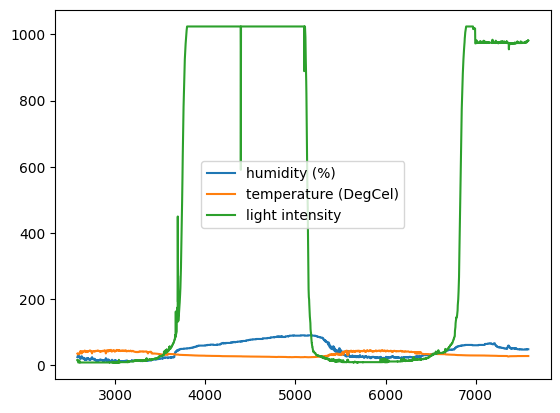

In [10]:
df_for_training = df[cols].astype(float)
df_for_plot = df_for_training.tail(5000)
df_for_plot.plot.line()

In [14]:
scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled= scaler.transform(df_for_training)

In [12]:
trainX = []
trainy = []

In [13]:
n_future = 1
n_past =10


In [15]:
for i in range (n_past, len(df_for_training_scaled) - n_future +1):
    trainX.append(df_for_training_scaled [i - n_past:i, 0:df_for_training.shape[1]])
    trainy.append(df_for_training_scaled[i + n_future - 1: i + n_future, 0])

trainX, trainy =np.array(trainX), np.array(trainy)

print('trainX Shape =={}.' .format(trainX.shape))
print('trainY Shape =={}.' .format(trainy.shape))

trainX Shape ==(7573, 10, 3).
trainY Shape ==(7573, 1).


In [27]:
time_steps = trainX.shape[1]  # Number of time steps
num_features = trainX.shape[2]  # Number of features


model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(time_steps, num_features), return_sequences=True))
model.add(SeqSelfAttention(attention_activation='sigmoid'))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(3))
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 10, 64)            17408     
                                                                 
 seq_self_attention_3 (SeqS  (None, 10, 64)            4161      
 elfAttention)                                                   
                                                                 
 lstm_11 (LSTM)              (None, 32)                12416     
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 34084 (133.14 KB)
Trainable params: 34084 (133.14 KB)
Non-trainable params: 0 (0.00 Byte)
________________

/home/disi/anaconda3/envs/ff/lib/python3.9/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


In [28]:
history = model.fit(trainX, trainy, epochs=20, batch_size=16, validation_split=0.2, verbose=1)

Epoch 1/20


379/379 [==============================] - 6s 9ms/step - loss: 0.1223 - val_loss: 0.0048
Epoch 2/20
379/379 [==============================] - 3s 7ms/step - loss: 0.0436 - val_loss: 0.0036
Epoch 3/20
379/379 [==============================] - 3s 7ms/step - loss: 0.0385 - val_loss: 0.0030
Epoch 4/20
379/379 [==============================] - 3s 7ms/step - loss: 0.0329 - val_loss: 0.0033
Epoch 5/20
379/379 [==============================] - 3s 7ms/step - loss: 0.0318 - val_loss: 0.0042
Epoch 6/20
379/379 [==============================] - 3s 7ms/step - loss: 0.0308 - val_loss: 0.0061
Epoch 7/20
379/379 [==============================] - 3s 7ms/step - loss: 0.0299 - val_loss: 0.0040
Epoch 8/20
379/379 [==============================] - 3s 7ms/step - loss: 0.0294 - val_loss: 0.0024
Epoch 9/20
379/379 [==============================] - 3s 7ms/step - loss: 0.0287 - val_loss: 0.0039
Epoch 10/20
379/379 [==============================] - 3s 7ms/step - loss: 0.0280 - val_loss: 0.0049
Epoch 11/2

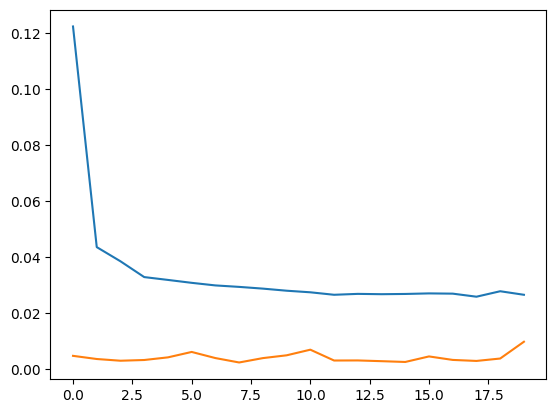

In [29]:
plt.plot(history.history['loss'], label = 'Training loss')
plt.plot(history.history['val_loss'], label = 'Validation loss')
plt.show()